# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
!pip install tweepy==4.6.0

In [2]:
import pandas as pd
import requests
import tweepy
import json
from time import sleep
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_enhanced_data = pd.read_csv('twitter-archive-enhanced.csv')
df_enhanced_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
with open(url.split('/')[-1], 'wb') as file:
    file.write(response.content)

In [6]:
df_image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
#client = tweepy.Client(bearer_token='Bearer Token', wait_on_rate_limit=True)

In [9]:
tweet_fields = ['created_at','id','public_metrics','source','text']
with open('tweet_json.txt', 'w') as file:
    for index,data in df_enhanced_data.iterrows():
        sleep(2)
        tweet_id = data['tweet_id']
        temp = client.get_tweet(id=tweet_id, tweet_fields=tweet_fields)
        public_data = {}
        public_data['tweet_id'] = tweet_id
        if temp.data:
            if temp.data.get('public_metrics'):
                print(tweet_id, index, temp.data['public_metrics'])
                for key, value in temp.data['public_metrics'].items():
                    public_data[key] = value
        file.writelines(json.dumps(public_data) + '\n')

892420643555336193 0 {'retweet_count': 6945, 'reply_count': 139, 'like_count': 33600, 'quote_count': 219}
892177421306343426 1 {'retweet_count': 5248, 'reply_count': 170, 'like_count': 29149, 'quote_count': 274}
891815181378084864 2 {'retweet_count': 3459, 'reply_count': 110, 'like_count': 21927, 'quote_count': 145}
891689557279858688 3 {'retweet_count': 7164, 'reply_count': 141, 'like_count': 36687, 'quote_count': 286}
891327558926688256 4 {'retweet_count': 7694, 'reply_count': 193, 'like_count': 35067, 'quote_count': 296}
891087950875897856 5 {'retweet_count': 2574, 'reply_count': 58, 'like_count': 17704, 'quote_count': 43}


In [7]:
with open('tweet_json.txt', 'r') as f:
    lines = f.readlines()
tweet_ids = []
retweet_counts = []
reply_counts = []
like_counts = []
quote_counts = []
for line in lines:
    lineObj = json.loads(line)
    tweet_ids.append(lineObj['tweet_id'])
    retweet_counts.append(lineObj['retweet_count'])
    reply_counts.append(lineObj['reply_count'])
    like_counts.append(lineObj['like_count'])
    quote_counts.append(lineObj['quote_count'])
data = {"tweet_id": tweet_ids, "retweet_count":retweet_counts, "reply_count":reply_counts, "like_count":like_counts, "quote_count":quote_counts}
df_public_metrics = pd.DataFrame(data)
df_public_metrics.head()

,tweet_id,retweet_count,reply_count,like_count,quote_count
0,892420643555336193,6949,139,33611,219
1,892177421306343426,5250,170,29155,274
2,891815181378084864,3459,110,21936,145
3,891689557279858688,7166,141,36699,286
4,891327558926688256,7696,193,35081,296


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
df_enhanced_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Visual Assessment Observation: 

1. There are None values in the last 4 columns which should have been NaN
2. The name has vales like 'a', 'an', None, etc.,

In [9]:
df_enhanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Observation:

1. tweet_id is int but other ids are float64
2. Non null count is greater for name, doggo and other columns that follows.
3. Timestamp is object datatype

In [10]:
df_enhanced_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Observation:

1. Rating numerator & denominator have very high max value. Rating is also available in text.
2. Rating denominator value is zero which is not acceptable for a denominator

In [11]:
df_enhanced_data.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

Observation:

1. name, doggo and subsequent fields don't have null because of None instead of NaN

In [12]:
df_enhanced_data[df_enhanced_data.name.apply(len)<=2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


Observation:

1. There are 79 names with just one or two characters

In [13]:
df_enhanced_data.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Observation:

1. URL is not needed and the values can be of category datatype

In [14]:
df_enhanced_data.expanded_urls[6]

'https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1'

In [15]:
df_enhanced_data.expanded_urls[0]

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

Observation: 
    
1. There are double links in expanded_urls and all expanded urls have a specific pattern

In [16]:
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df_image_predictions.sample(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
109,667885044254572545,https://pbs.twimg.com/media/CUTN5V4XAAAIa4R.jpg,1,malamute,0.088530,True,golden_retriever,0.087499,True,muzzle,0.075008,False
912,700847567345688576,https://pbs.twimg.com/media/CbnpI_1XIAAiRAz.jpg,1,Rhodesian_ridgeback,0.252514,True,redbone,0.153005,True,whippet,0.135199,True
441,674468880899788800,https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg,2,chow,0.526230,True,Pomeranian,0.283647,True,toy_poodle,0.067665,True
625,680798457301471234,https://pbs.twimg.com/media/CXKuiyHUEAAMAGa.jpg,1,ram,0.499761,False,hog,0.283795,False,ox,0.067455,False
863,697259378236399616,https://pbs.twimg.com/media/Ca0ps3AXEAAnp9m.jpg,1,Great_Dane,0.999223,True,boxer,0.000187,True,whippet,0.000151,True
1280,750132105863102464,https://pbs.twimg.com/media/CmkBKuwWgAAamOI.jpg,1,toy_poodle,0.478018,True,miniature_poodle,0.207458,True,croquet_ball,0.085879,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
458,674788554665512960,https://pbs.twimg.com/media/CV1Um8vWIAAmhQn.jpg,1,miniature_poodle,0.349561,True,toy_poodle,0.154711,True,Maltese_dog,0.134229,True
590,679148763231985668,https://pbs.twimg.com/media/CWzSMmAWsAAyB1u.jpg,1,Italian_greyhound,0.302685,True,hair_slide,0.124281,False,Afghan_hound,0.059846,True
1284,750506206503038976,https://pbs.twimg.com/media/CmpVaOZWIAAp3z6.jpg,1,American_black_bear,0.219166,False,lesser_panda,0.214715,False,titi,0.091685,False


Observation:

1. There are values in p1, p2, p3 which are not dogs like ice_bear, doormat, ibex, tub, etc.,
2. The information like confidence and dog names can be grouped

In [19]:
df_public_metrics

,tweet_id,retweet_count,reply_count,like_count,quote_count
0,892420643555336193,6949,139,33611,219
1,892177421306343426,5250,170,29155,274
2,891815181378084864,3459,110,21936,145
3,891689557279858688,7166,141,36699,286
4,891327558926688256,7696,193,35081,296
5,891087950875897856,2577,58,17706,43
6,890971913173991426,1641,51,10303,55
7,890729181411237888,15643,157,56535,377
8,890609185150312448,3596,92,24370,129
9,890240255349198849,6048,141,27777,352


In [20]:
df_public_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 5 columns):
tweet_id         2356 non-null int64
retweet_count    2356 non-null int64
reply_count      2356 non-null int64
like_count       2356 non-null int64
quote_count      2356 non-null int64
dtypes: int64(5)
memory usage: 92.1 KB


In [21]:
df_public_metrics.describe()

,tweet_id,retweet_count,reply_count,like_count,quote_count
count,2.356000e+03,2356.000000,2356.000000,2356.000000,2356.000000
mean,7.427716e+17,2420.612903,41.539898,6922.620119,70.688455
std,6.856705e+16,4133.363090,70.286134,10849.851670,219.157622
min,6.660209e+17,0.000000,0.000000,0.000000,0.000000
25%,6.783989e+17,474.000000,9.000000,1145.500000,0.000000
50%,7.196279e+17,1118.500000,23.000000,2998.000000,1.000000
75%,7.993373e+17,2805.500000,47.000000,8442.500000,68.000000
max,8.924206e+17,70048.000000,1119.000000,143778.000000,4353.000000


In [22]:
df_public_metrics.sample(30)

,tweet_id,retweet_count,reply_count,like_count,quote_count
2159,669571471778410496,875,8,1401,0
2115,670428280563085312,519,6,1221,0
1847,675820929667219457,205,7,954,0
1661,683030066213818368,664,10,1990,0
1141,727644517743104000,1582,50,5363,2
499,813127251579564032,2904,28,11160,93
1852,675707330206547968,594,13,1782,0
710,784826020293709826,2984,35,9531,89
311,835297930240217089,2728,77,15372,166
357,830173239259324417,5207,0,0,0


### Quality issues

#### df_enhanced_data
1. The name column has values starting with lowercase and has values like 'a', 'an', 'the' and there are 79 rows with name less than or equal to 2 characters

2. retweeted_status_timestamp, timestamp column is in object datatype, can be datetime

3. None values are present in name, doggo, floofer, pupper, puppo columns when should add to null count

4. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id can be int like tweet_id. These are the tweets which are not original tweets

5. Rating numerator ranges to high tens and thousands which seems to be invalid

6. Rating denominator is zero for a value and also has some other invalid values than 10

7. HTML in source column and can also be a category

8. There are double links in exapnded_urls

#### df_image_predictions

9. There are values in p1, p2, p3 which are not dogs like ice_bear, doormat, ibex, tub, etc., and the values are not in consistent case
10. The confidence and names can be grouped

### Tidiness issues
1. The dataframes are of different lengths. 

2. The dataframes df_enhanced_data, df_image_predictions, df_public_metrics should be combined together

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [23]:
# Make copies of original pieces of data
df_enhanced_data_clean = df_enhanced_data.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_public_metrics_clean = df_public_metrics.copy()

### Issue #1: 

#### Define: Join the df_enhanced_data_clean, df_image_predictions_clean, df_public_metrics_clean into a master dataframe

#### Code

In [24]:
df_enhanced_data_clean = pd.merge(left=df_enhanced_data_clean, right=df_image_predictions_clean, left_on='tweet_id', right_on='tweet_id', how='inner')
df_enhanced_data_clean = pd.merge(left=df_enhanced_data_clean, right=df_public_metrics_clean, left_on='tweet_id', right_on='tweet_id', how='inner')
df_enhanced_data_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,reply_count,like_count,quote_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,6949,139,33611,219
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,5250,170,29155,274
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,3459,110,21936,145
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,7166,141,36699,286
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7696,193,35081,296


#### Test

In [25]:
df_enhanced_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 32 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
jpg_url                       2075 

### Issue #2:

#### Define: Remove the rows that are retweeted and the columns after the rows are removed

#### Code

In [26]:
df_enhanced_data_clean = df_enhanced_data_clean[df_enhanced_data_clean['retweeted_status_id'].isnull()]
df_enhanced_data_clean = df_enhanced_data_clean[df_enhanced_data_clean['in_reply_to_status_id'].isnull()]

#### Test

In [27]:
df_enhanced_data_clean[~df_enhanced_data_clean['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,reply_count,like_count,quote_count


In [28]:
df_enhanced_data_clean[~df_enhanced_data_clean['in_reply_to_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,reply_count,like_count,quote_count


In [29]:
df_enhanced_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 32 columns):
tweet_id                      1971 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null object
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-null object
puppo                         1971 non-null object
jpg_url                       1971 non-n

#### Define: There are no rows with retweets. Let's remove the columns as there is no data in these columns

#### Code

In [30]:
df_enhanced_data_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                             'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [31]:
df_enhanced_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 27 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null obj

### Issue #3:

#### Define: RemoveHTML tags from source 

#### Code

In [32]:
df_enhanced_data_clean['source'] = df_enhanced_data_clean.source.apply(lambda x: re.findall('>(.*?)<', x)[0])

#### Test

In [33]:
df_enhanced_data_clean.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### Issue #4:

#### Define: Change the time datatype to datetime

#### Code

In [34]:
df_enhanced_data_clean['timestamp'] = pd.to_datetime(df_enhanced_data_clean['timestamp'])

#### Test

In [35]:
df_enhanced_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 27 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-

### Issue #5:

#### Define: Treating double links in expanded urls

#### Code

In [36]:
def treat_url(tweet_id):
    return 'https://twitter.com/dog_rates/status/{}/photo/1'.format(tweet_id)

In [37]:
df_enhanced_data_clean['expanded_urls'] = df_enhanced_data_clean.apply(lambda x: treat_url(x['tweet_id']), axis=1)

#### Test

In [38]:
df_enhanced_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 27 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-

### Issue #6:

#### Define: Treating numerator and denominator values

#### Code

In [39]:
df_enhanced_data_clean[df_enhanced_data_clean['rating_denominator']!=10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,reply_count,like_count,quote_count
346,820690176645140481,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,...,kuvasz,0.059526,True,Samoyed,0.037400,True,2983,72,11526,100
416,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,https://twitter.com/dog_rates/status/810984652...,24,7,Sam,None,None,...,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,1320,16,5020,42
736,758467244762497024,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,...,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True,2018,46,4456,182
878,740373189193256964,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,...,kuvasz,0.101286,True,Labrador_retriever,0.023785,True,12056,177,32408,322
926,731156023742988288,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,...,breakwater,0.051351,False,king_penguin,0.049444,False,1138,26,3531,3
969,722974582966214656,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,...,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,1425,26,3747,1
1003,716439118184652801,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,...,malamute,0.317053,True,Eskimo_dog,0.273419,True,189,11,2182,0
1024,713900603437621249,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,...,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,655,9,2606,0
1049,710658690886586372,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,...,Dandie_Dinmont,0.018664,True,cairn,0.015943,True,512,16,2132,0
1067,709198395643068416,2016-03-14 02:04:08,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,...,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True,587,28,2260,0


 Tweet_id           |       Rating in Text       |   Summarized Rating   |
--------------------| ---------------------------| ----------------------|
820690176645140481  |               84/70        |         12/10         |
758467244762497024  |              165/150       |         11/10         |
740373189193256964  |               14/10        |         14/10         |
731156023742988288  |              204/170       |         12/10         |
722974582966214656  |               13/10        |         13/10         |
716439118184652801  |               11/10        |         11/10         |
713900603437621249  |               99/90        |         11/10         |
710658690886586372  |               80/80        |         10/10         |
709198395643068416  |               45/50        |          9/10         |
704054845121142784  |               60/50        |         12/10         |
697463031882764288  |               44/40        |         12/10         |
684222868335505415  |              121/110       |         11/10         |
682962037429899265  |               10/10        |         10/10         |
677716515794329600  |              144/120       |         12/10         |
675853064436391936  |               88/80        |         11/10         |
666287406224695296  |                9/10        |          9/10         |

In [40]:
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 346, 'rating_numerator'] = 12
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 346, 'rating_denominator'] = 10
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 736, 'rating_numerator'] = 14
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 736, 'rating_denominator'] = 10
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 878, 'rating_numerator'] = 12
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 878, 'rating_denominator'] = 10
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 926, 'rating_numerator'] = 13
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 926, 'rating_denominator'] = 10
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 969, 'rating_numerator'] = 11
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 969, 'rating_denominator'] = 10
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 1003, 'rating_numerator'] = 11
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 1003, 'rating_denominator'] = 10
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 1024, 'rating_numerator'] = 10
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 1024, 'rating_denominator'] = 10
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 1049, 'rating_numerator'] = 9
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 1049, 'rating_denominator'] = 10
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 1067, 'rating_numerator'] = 12
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 1067, 'rating_denominator'] = 10
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 1133, 'rating_numerator'] = 12
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 1133, 'rating_denominator'] = 10
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 1209, 'rating_numerator'] = 11
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 1209, 'rating_denominator'] = 10
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 1382, 'rating_numerator'] = 10
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 1382, 'rating_denominator'] = 10
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 1407, 'rating_numerator'] = 12
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 1407, 'rating_denominator'] = 10
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 1514, 'rating_numerator'] = 11
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 1514, 'rating_denominator'] = 10
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 1573, 'rating_numerator'] = 9
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 1573, 'rating_denominator'] = 10
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 2054, 'rating_numerator'] = 11
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 2054, 'rating_denominator'] = 10

#### Test

In [41]:
df_enhanced_data_clean[df_enhanced_data_clean['rating_denominator']!=10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,reply_count,like_count,quote_count
416,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,https://twitter.com/dog_rates/status/810984652...,24,7,Sam,None,None,...,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,1320,16,5020,42


### Issue #7:

#### Define: Numerator values have decimal values

In [42]:
df_enhanced_data_clean[df_enhanced_data_clean.text.apply(lambda x: len(re.findall('(\d+\.\d+)\/(\d+)', x))>0)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,reply_count,like_count,quote_count
41,883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,...,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,8197,177,39946,303
559,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,...,Persian_cat,0.122978,False,chow,0.102654,True,5686,157,17280,362
615,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,...,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,1482,43,6162,49
1453,680494726643068929,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,...,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,435,3,1566,0


#### Code

In [43]:
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 41, 'rating_numerator'] = 13.5
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 559, 'rating_numerator'] = 9.75
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 615, 'rating_numerator'] = 11.27
df_enhanced_data_clean.loc[df_enhanced_data_clean.index == 1453, 'rating_numerator'] = 11.26

#### Test

In [44]:
df_enhanced_data_clean.loc[41]['rating_numerator']

13.5

### Issue #8:

#### Define: Identify names starting with lowercase and less than or equal to 2 character length

In [45]:
df_enhanced_data_clean[df_enhanced_data_clean['name']=='None'].shape

(524, 27)

In [46]:
noisy_names = df_enhanced_data_clean[df_enhanced_data_clean.name.apply(lambda x: len(x)<=2 and x[0].islower())]['name'].unique().tolist()

#### Code

In [47]:
df_enhanced_data_clean.loc[df_enhanced_data_clean['name'].isin(noisy_names), 'name'] = 'None'

#### Test

In [48]:
df_enhanced_data_clean[df_enhanced_data_clean['name']=='None'].shape

(587, 27)

### Issue #9:

#### Define: Change None to NaN

In [49]:
df_enhanced_data_clean[df_enhanced_data_clean.doggo == 'None'].shape

(1898, 27)

#### Code

In [50]:
df_enhanced_data_clean = df_enhanced_data_clean.replace('None', np.nan)

#### Test

In [51]:
df_enhanced_data_clean[df_enhanced_data_clean.doggo == 'None'].shape

(0, 27)

In [52]:
df_enhanced_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 27 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null int64
name                  1384 non-null object
doggo                 73 non-null object
floofer               8 non-null object
pupper                209 non-null object
puppo                 23 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null o

### Issue #10:

#### Define: Merge doggo, floofer, pupper and puppo as a single column - dog_type

#### Code

In [53]:
def set_dog_type(doggo, floofer, pupper, puppo):
    data = []
    if doggo == 'doggo':
        data.append('doggo')
    elif floofer == 'floofer':
        data.append('floofer')
    elif pupper == 'pupper':
        data.append('pupper')
    elif puppo == 'puppo':
        data.append('puppo')
    if len(data) == 0:
        return np.nan
    return data

In [54]:
df_enhanced_data_clean['dog_type'] = df_enhanced_data_clean.apply(lambda x: set_dog_type(x['doggo'], x['floofer'], x['pupper'], x['puppo']), axis=1)

In [55]:
df_enhanced_data_clean = df_enhanced_data_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)

#### Test

In [56]:
df_enhanced_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 24 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null int64
name                  1384 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
retweet_count         1971 non-null int64
reply_count           1971 non-

### Issue #11:

#### Define: Correct the case of p1,p2,p3. Merge p1,p2 and p3 along with their confidence if p1_dog or p2_dog or p3_dog is True respectively. Drop img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog

#### Code

In [57]:
def merge_dog_prediction(row):
    prediction = []
    confidence = []
    if row['p1_dog']:
        prediction.append(row['p1'].lower())
        confidence.append(row['p1_conf'])
    if row['p2_dog']:
        prediction.append(row['p2'].lower())
        confidence.append(row['p2_conf'])
    if row['p3_dog']:
        prediction.append(row['p3'].lower())
        confidence.append(row['p3_conf'])
    if prediction == []:
        prediction = np.nan
    if confidence == []:
        confidence = 0
    row['prediction'] = prediction
    row['confidence'] = confidence
    return row

In [58]:
df_enhanced_data_clean = df_enhanced_data_clean.apply(lambda x: merge_dog_prediction(x), axis=1)

In [59]:
df_enhanced_data_clean.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

#### Test

In [60]:
df_enhanced_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 16 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null int64
name                  1384 non-null object
jpg_url               1971 non-null object
retweet_count         1971 non-null int64
reply_count           1971 non-null int64
like_count            1971 non-null int64
quote_count           1971 non-null int64
dog_type              303 non-null object
prediction            1666 non-null object
confidence            1971 non-null object
dtypes: datetime64[ns](1), float64(1), int64(6), object(8)
memory usage: 341.8+ KB


In [61]:
df_enhanced_data_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,retweet_count,reply_count,like_count,quote_count,dog_type,prediction,confidence
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,6949,139,33611,219,NaN,NaN,0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,5250,170,29155,274,NaN,"[chihuahua, pekinese, papillon]","[0.323581, 0.0906465, 0.0689569]"
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,3459,110,21936,145,NaN,"[chihuahua, malamute, kelpie]","[0.716012, 0.078253, 0.0313789]"
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,7166,141,36699,286,NaN,[labrador_retriever],[0.168086]
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,7696,193,35081,296,NaN,"[basset, english_springer, german_short-haired...","[0.555712, 0.22577, 0.175219]"


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [62]:
df_enhanced_data_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Percentage of users tweeting from iPhone

In [63]:
df_enhanced_data_clean.shape

(1971, 16)

In [64]:
df_enhanced_data_clean.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [65]:
1932/1971

0.9802130898021308

### Distribution of rating - What are the top ratings?

In [66]:
df_enhanced_data_clean['rating'] = df_enhanced_data_clean['rating_numerator']/df_enhanced_data_clean['rating_denominator']

In [67]:
ratings = df_enhanced_data_clean['rating'].value_counts().reset_index()

In [68]:
ratings.columns = ['rating', 'count']
ratings = ratings[ratings['count']>10] #Let's ignore ratings where the count is minimal
ratings

,rating,count
0,1.2,451
1,1.0,419
2,1.1,397
3,1.3,254
4,0.9,151
5,0.8,95
6,0.7,51
7,1.4,34
8,0.5,32
9,0.6,32


### Retweet count by rating

In [69]:
retweets = df_enhanced_data_clean[df_enhanced_data_clean['rating'].isin([0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3])].groupby('rating')['retweet_count'].sum().reset_index()
retweets

,rating,retweet_count
0,0.7,42946
1,0.8,67687
2,0.9,96842
3,1.0,493193
4,1.1,695126
5,1.2,1161332
6,1.3,1447388


### Likes by rating

In [70]:
likes = df_enhanced_data_clean[df_enhanced_data_clean['rating'].isin([0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3])].groupby('rating')['like_count'].sum().reset_index()
likes

,rating,like_count
0,0.7,128766
1,0.8,194581
2,0.9,305268
3,1.0,1437006
4,1.1,2308804
5,1.2,4449593
6,1.3,5068066


### Dog Type Distribution

In [71]:
df_enhanced_data_clean['dog_type'].astype('str').value_counts()

nan            1668
['pupper']      201
['doggo']        73
['puppo']        22
['floofer']       7
Name: dog_type, dtype: int64

### Insights:
1. 98% of twitter users in WeRateDogs tweeted from their iPhones

2. Top ratings are 12/10, 10/10, 11/10 and 13/10

3. The retweet count increases exponentially as the rating increases

4. Most of the tweets do not have dog type. Pupper is the largest type which is mentioned in the tweets

### Visualization

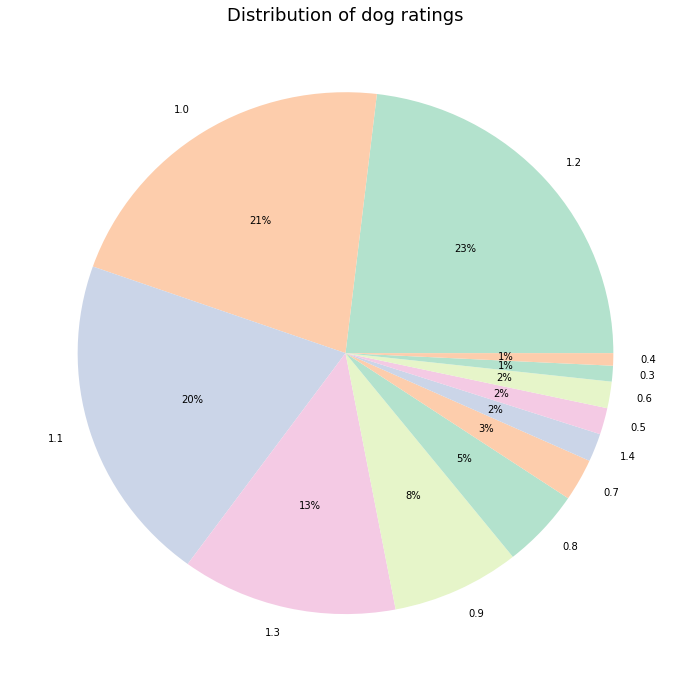

In [72]:
fig,ax = plt.subplots(figsize=(12,12))
colors = sns.color_palette('Pastel2')[0:5]
plt.pie(x=ratings['count'], labels=ratings['rating'], colors=colors, autopct='%.0f%%')
plt.title('Distribution of dog ratings', fontsize=18);
plt.show();

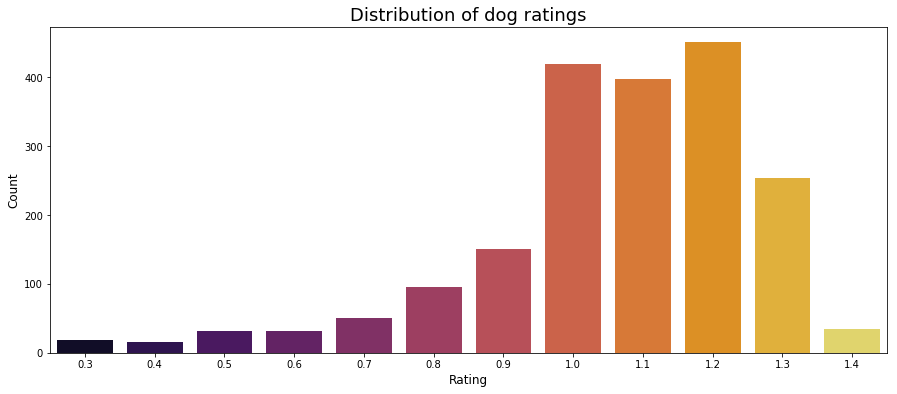

In [73]:
fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(x=ratings['rating'],y=ratings['count'], palette='inferno')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of dog ratings', fontsize=18)
plt.show();

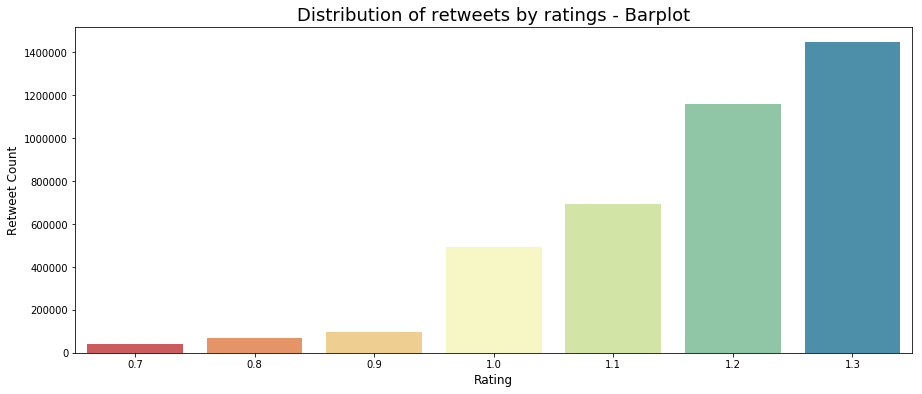

In [74]:
fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(x=retweets['rating'],y=retweets['retweet_count'], palette='Spectral')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Retweet Count', fontsize=12)
plt.title('Distribution of retweets by ratings - Barplot', fontsize=18)
plt.show();

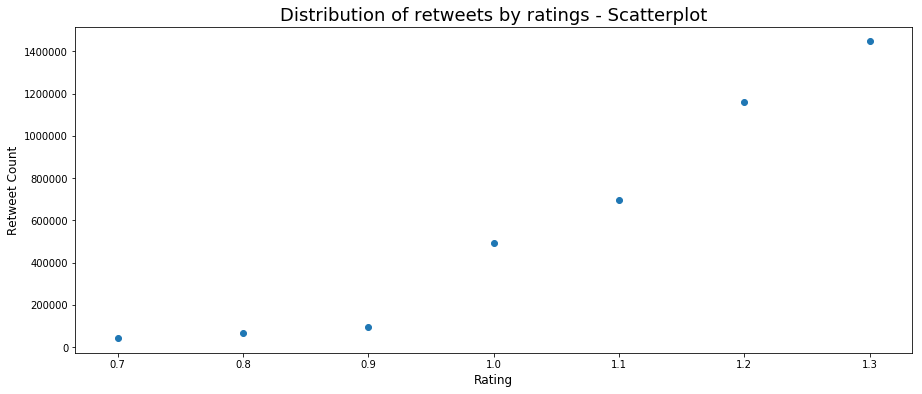

In [75]:
fig,ax = plt.subplots(figsize=(15,6))
plt.scatter(x=retweets['rating'],y=retweets['retweet_count'])
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Retweet Count', fontsize=12)
plt.title('Distribution of retweets by ratings - Scatterplot', fontsize=18)
plt.show();

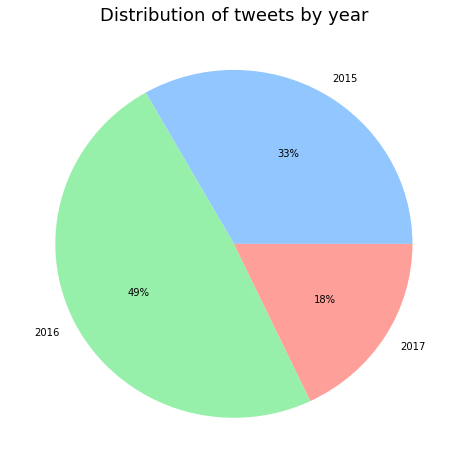

In [76]:
yearwise_tweets = df_enhanced_data_clean.groupby(df_enhanced_data_clean.timestamp.dt.year)['tweet_id'].count().reset_index()
yearwise_tweets.columns = ['year', 'tweets']
fig,ax = plt.subplots(figsize=(8,8))
colors = sns.color_palette('pastel')[0:5]
plt.pie(x=yearwise_tweets['tweets'], labels=yearwise_tweets['year'], colors=colors, autopct='%.0f%%')
plt.title('Distribution of tweets by year', fontsize=18);
plt.show();

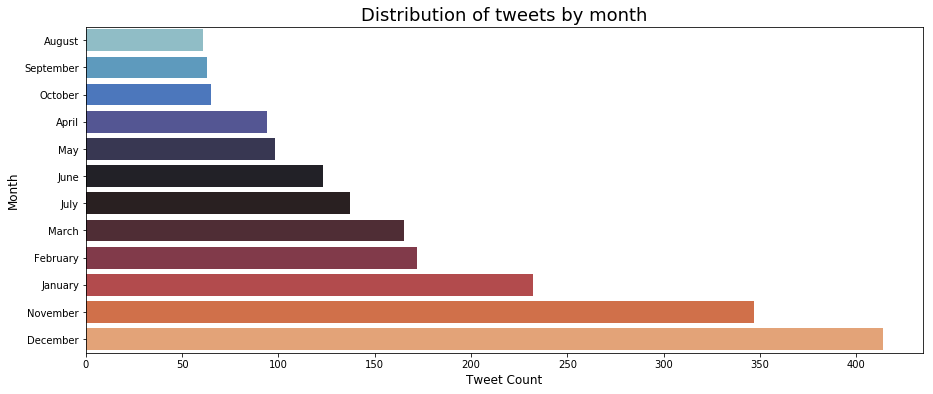

In [77]:
monthwise_tweets = df_enhanced_data_clean.groupby(df_enhanced_data_clean.timestamp.dt.month_name())['tweet_id'].count().sort_values().reset_index()
monthwise_tweets.columns = ['month', 'tweets']
fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(y=monthwise_tweets['month'], x=monthwise_tweets['tweets'], palette='icefire')
plt.ylabel('Month', fontsize=12)
plt.xlabel('Tweet Count', fontsize=12)
plt.title('Distribution of tweets by month', fontsize=18)
plt.show();

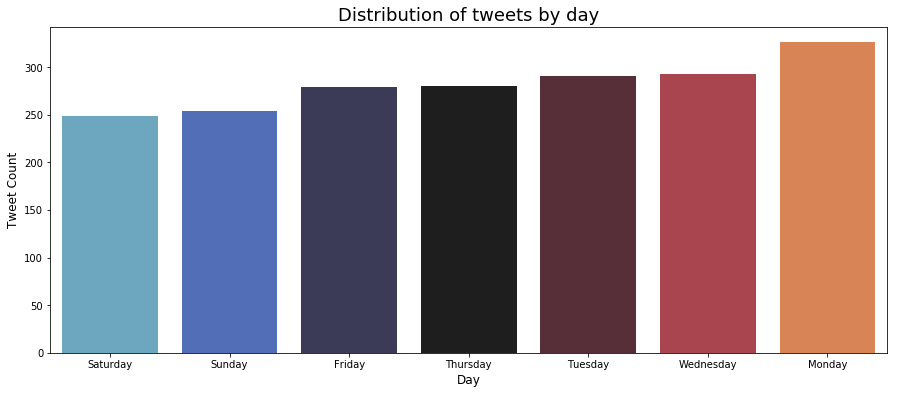

In [78]:
daywise_tweets = df_enhanced_data_clean.groupby(df_enhanced_data_clean.timestamp.dt.weekday_name)['tweet_id'].count().sort_values().reset_index()
daywise_tweets.columns = ['day', 'tweets']
fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(x=daywise_tweets['day'], y=daywise_tweets['tweets'], palette='icefire')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Tweet Count', fontsize=12)
plt.title('Distribution of tweets by day', fontsize=18)
plt.show();